# MSCA 32009  Health Analytics
## Assignment 2 - Cancer Survival Analysis
## Jack Gao

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [70]:
df = pd.read_excel("/Users/Xingkang/Desktop/UChicago/Quarter 2/MSCA 32009 Health Analytics/Cancer patient data.xlsx")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  8468 non-null   datetime64[ns]
 1   DEATH_DATE_off  447 non-null    datetime64[ns]
 2   sex             8468 non-null   object        
 3   race            8466 non-null   object        
 4   LUNG            8468 non-null   int64         
 5   PANCREAS        8468 non-null   int64         
 6   THYROID         8468 non-null   int64         
 7   COLORECTAL      8468 non-null   int64         
 8   MELANOMA        8468 non-null   int64         
 9   LUNG DT         1485 non-null   datetime64[ns]
 10  PANCREAS_DT     660 non-null    datetime64[ns]
 11  THYROID_DT      745 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

In [72]:
df.head(10)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
0,1959-12-02,NaT,Male,Black/African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT
1,1955-11-18,2016-04-20,Male,Black/African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT
2,1946-01-14,2015-05-25,Female,Black/African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT
3,1932-07-28,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
4,1943-04-17,NaT,Male,White,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
5,1950-08-20,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
6,1946-11-03,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT
7,1938-06-10,NaT,Female,Black/African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT
8,1947-02-27,NaT,Female,Black/African-American,0,0,0,0,0,NaT,NaT,NaT,NaT,NaT
9,1957-10-18,NaT,Male,Black/African-American,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT


In [73]:
df['LUNG'].value_counts()

0    6983
1    1485
Name: LUNG, dtype: int64

In [74]:
df['PANCREAS'].value_counts()

0    7808
1     660
Name: PANCREAS, dtype: int64

In [75]:
df['THYROID'].value_counts()

0    7723
1     745
Name: THYROID, dtype: int64

Check if there is any Diagnosis Date missing for each of the five cancer types

In [76]:
df[df['race'].isnull()] # 3082 and 5792 don't have race information

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
3082,1945-05-05,2012-08-29,Female,NaN,1,0,0,0,0,2012-08-11,NaT,NaT,NaT,NaT
5792,1932-05-26,NaT,Female,NaN,0,1,0,0,0,NaT,2012-04-04,NaT,NaT,NaT


## Data Pre-Processsing Notes:
1. Remove all patients who were diagnosed after 8/25/16
2. Keep patients who died after 8/25/16
3. Remove all patients who don't have dianosis date
4. Categorize race into White, African-American, Asian/Mideast-Indian, and Others

### 1. Remove all patients who were diagnosed after 2016-08-25

In [77]:
DT_Filter = (df['LUNG DT']>'2016-08-25') | (df['PANCREAS_DT']>'2016-08-25') | (df['THYROID_DT']>'2016-08-25') | (df['COLORECTAL_DT']>'2016-08-25') | (df['MELANOMA_DT']>'2016-08-25')

In [78]:
df[DT_Filter]

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
82,1939-12-09,NaT,Female,Black/African-American,1,0,0,0,0,2016-09-05,NaT,NaT,NaT,NaT
174,1946-05-02,NaT,Male,White,1,0,0,0,0,2016-09-05,NaT,NaT,NaT,NaT
1587,1943-12-05,NaT,Female,White,0,1,0,0,0,NaT,2016-09-01,NaT,NaT,NaT
1905,1937-03-24,NaT,Female,White,0,1,0,0,0,NaT,2016-09-04,NaT,NaT,NaT
5226,1977-03-12,NaT,Female,White,0,0,1,0,0,NaT,NaT,2016-09-26,NaT,NaT


In [79]:
df2 = df[~DT_Filter]

In [80]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8463 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  8463 non-null   datetime64[ns]
 1   DEATH_DATE_off  447 non-null    datetime64[ns]
 2   sex             8463 non-null   object        
 3   race            8461 non-null   object        
 4   LUNG            8463 non-null   int64         
 5   PANCREAS        8463 non-null   int64         
 6   THYROID         8463 non-null   int64         
 7   COLORECTAL      8463 non-null   int64         
 8   MELANOMA        8463 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

### 2. Keep patients who died after 8/25/16 (we will censor them)

### 3. Remove all patients who  do not have a diagnosis date

In [81]:
DT_Filter_2 = df2['LUNG DT'].isnull() & df2['PANCREAS_DT'].isnull() & df2['THYROID_DT'].isnull() & df2['COLORECTAL_DT'].isnull() & df2['MELANOMA_DT'].isnull()

In [82]:
df3 = df2[~DT_Filter_2]

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4146 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

#### There are 2 people who have both THYROID and COLORECTAL cancer

In [84]:
df3[(df3['COLORECTAL']==1) & (df3['THYROID']==1)]

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT
308,1954-04-20,NaT,Female,Black/African-American,0,0,1,1,0,NaT,NaT,2015-05-06,2010-12-04,NaT
6257,1933-03-06,NaT,Female,Black/African-American,0,0,1,1,0,NaT,NaT,2012-10-12,2012-08-06,NaT


### 4. Categorize race into White, African-American, Asian/Mideast-Indian, and Others

In [85]:
df3['race'].value_counts()

White                                     2815
Black/African-American                     956
Unknown                                    163
Asian/Mideast Indian                       117
More than one Race                          49
Patient Declined                            25
Native Hawaiian/Other Pacific Islander      17
American Indian or Alaska Native             4
Name: race, dtype: int64

In [86]:
df3.loc[df3['race']=='Unknown','race'] = 'Others'
df3.loc[df3['race']=='More than one Race','race'] = 'Others'
df3.loc[df3['race']=='Patient Declined','race'] = 'Others'
df3.loc[df3['race']=='Native Hawaiian/Other Pacific Islander','race'] = 'Others'
df3.loc[df3['race']=='American Indian or Alaska Native','race'] = 'Others'
df3.loc[df3['race']=='Black/African-American','race'] = 'African-American'
df3.loc[df3['race'].isnull(),'race']='Others'

In [87]:
df3['race'].value_counts()

White                   2815
African-American         956
Others                   260
Asian/Mideast Indian     117
Name: race, dtype: int64

In [88]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4148 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 

In [89]:
df3[df3['DEATH_DATE_off'].notnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 1 to 8387
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  326 non-null    datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             326 non-null    object        
 3   race            326 non-null    object        
 4   LUNG            326 non-null    int64         
 5   PANCREAS        326 non-null    int64         
 6   THYROID         326 non-null    int64         
 7   COLORECTAL      326 non-null    int64         
 8   MELANOMA        326 non-null    int64         
 9   LUNG DT         196 non-null    datetime64[ns]
 10  PANCREAS_DT     44 non-null     datetime64[ns]
 11  THYROID_DT      8 non-null      datetime64[ns]
 12  COLORECTAL_DT   64 non-null     datetime64[ns]
 13  MELANOMA_DT     18 non-null     datetime64[ns]
dtypes: datetime64[ns](7), int64(5), object(2)
memory usage: 3

### 5. Create Died Indicator Column (1 means die, 0 means not die or no info.)

In [90]:
for dateset in df3:
    df3.loc[df3['DEATH_DATE_off'].notnull(),'Death'] = 1
    df3.loc[df3['DEATH_DATE_off'].isnull(),'Death']= 0

In [91]:
for dataset in df3:
    df3.loc[df3['DEATH_DATE_off']>'2016-08-25','Death'] = 0

In [92]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4148 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Death           4148 non-null   float64       
dtypes: d

In [93]:
df3['Death'].value_counts()

0.0    3851
1.0     297
Name: Death, dtype: int64

In [94]:
df3[df3['DEATH_DATE_off']>'2016-08-25'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 92 to 8219
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  29 non-null     datetime64[ns]
 1   DEATH_DATE_off  29 non-null     datetime64[ns]
 2   sex             29 non-null     object        
 3   race            29 non-null     object        
 4   LUNG            29 non-null     int64         
 5   PANCREAS        29 non-null     int64         
 6   THYROID         29 non-null     int64         
 7   COLORECTAL      29 non-null     int64         
 8   MELANOMA        29 non-null     int64         
 9   LUNG DT         12 non-null     datetime64[ns]
 10  PANCREAS_DT     11 non-null     datetime64[ns]
 11  THYROID_DT      0 non-null      datetime64[ns]
 12  COLORECTAL_DT   6 non-null      datetime64[ns]
 13  MELANOMA_DT     1 non-null      datetime64[ns]
 14  Death           29 non-null     float64       
dtypes: da

### 6. Find patients who have multiple cancer diagnosis (Total headcount should be 4177 - 4148 = 29)

In [95]:
Filter = (df3['LUNG']+df3['PANCREAS']+df3['THYROID']+df3['COLORECTAL']+df3['MELANOMA'])>1

In [96]:
df3[Filter].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 41 to 7144
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  29 non-null     datetime64[ns]
 1   DEATH_DATE_off  4 non-null      datetime64[ns]
 2   sex             29 non-null     object        
 3   race            29 non-null     object        
 4   LUNG            29 non-null     int64         
 5   PANCREAS        29 non-null     int64         
 6   THYROID         29 non-null     int64         
 7   COLORECTAL      29 non-null     int64         
 8   MELANOMA        29 non-null     int64         
 9   LUNG DT         23 non-null     datetime64[ns]
 10  PANCREAS_DT     9 non-null      datetime64[ns]
 11  THYROID_DT      6 non-null      datetime64[ns]
 12  COLORECTAL_DT   15 non-null     datetime64[ns]
 13  MELANOMA_DT     5 non-null      datetime64[ns]
 14  Death           29 non-null     float64       
dtypes: da

In [97]:
df3[Filter]

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Death
41,1928-03-25,NaT,Female,African-American,1,0,0,1,0,2012-02-22,NaT,NaT,2013-12-11,NaT,0.0
164,1924-11-30,NaT,Female,African-American,1,0,0,1,0,2013-02-04,NaT,NaT,2013-01-14,NaT,0.0
308,1954-04-20,NaT,Female,African-American,0,0,1,1,0,NaT,NaT,2015-05-06,2010-12-04,NaT,0.0
557,1942-11-10,NaT,Female,White,1,0,0,1,0,2013-09-14,NaT,NaT,2013-08-16,NaT,0.0
611,1955-03-23,NaT,Male,White,0,1,0,0,1,NaT,2014-02-14,NaT,NaT,2013-12-13,0.0
1087,1936-02-24,NaT,Male,White,0,1,0,0,1,NaT,2011-03-28,NaT,NaT,2012-03-21,0.0
1467,1951-07-25,NaT,Female,White,1,0,0,1,0,2012-05-22,NaT,NaT,2012-05-12,NaT,0.0
1490,1947-06-02,2016-02-10,Male,Others,1,0,1,0,0,2013-12-27,NaT,2014-09-05,NaT,NaT,1.0
1510,1940-05-24,NaT,Male,White,1,0,0,1,0,2014-07-21,NaT,NaT,2011-10-09,NaT,0.0
1660,1931-09-09,NaT,Female,White,1,0,1,0,0,2013-08-27,NaT,2013-08-16,NaT,NaT,0.0


### 7. Calculate the age when a person is diagnosed with cancer

In [98]:
df3.head(10)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Death
0,1959-12-02,NaT,Male,African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,0.0
1,1955-11-18,2016-04-20,Male,African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,1.0
2,1946-01-14,2015-05-25,Female,African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,1.0
6,1946-11-03,NaT,Female,African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,0.0
7,1938-06-10,NaT,Female,African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,0.0
9,1957-10-18,NaT,Male,African-American,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT,0.0
12,1940-02-04,NaT,Male,African-American,1,0,0,0,0,2013-05-21,NaT,NaT,NaT,NaT,0.0
13,1971-08-11,NaT,Female,African-American,0,0,0,1,0,NaT,NaT,NaT,2014-01-01,NaT,0.0
14,1948-03-22,2016-01-07,Female,African-American,0,0,0,1,0,NaT,NaT,NaT,2014-09-30,NaT,1.0
15,1940-12-24,2012-09-30,Female,African-American,1,0,0,0,0,2012-09-26,NaT,NaT,NaT,NaT,1.0


In [99]:
pd.DatetimeIndex(df3['BIRTH_DATE_off']).year[1]

1955

In [100]:
for dataset in df3:
    df3.loc[df3['LUNG']==1,'LUNG_DA'] = pd.DatetimeIndex(df3.loc[df3['LUNG']==1,'LUNG DT']).year - pd.DatetimeIndex(df3.loc[df3['LUNG']==1,'BIRTH_DATE_off']).year
    df3.loc[df3['PANCREAS']==1,'PANCREAS_DA'] = pd.DatetimeIndex(df3.loc[df3['PANCREAS']==1,'PANCREAS_DT']).year - pd.DatetimeIndex(df3.loc[df3['PANCREAS']==1,'BIRTH_DATE_off']).year
    df3.loc[df3['THYROID']==1,'THYROID_DA'] = pd.DatetimeIndex(df3.loc[df3['THYROID']==1,'THYROID_DT']).year - pd.DatetimeIndex(df3.loc[df3['THYROID']==1,'BIRTH_DATE_off']).year
    df3.loc[df3['COLORECTAL']==1,'COLORECTAL_DA'] = pd.DatetimeIndex(df3.loc[df3['COLORECTAL']==1,'COLORECTAL_DT']).year - pd.DatetimeIndex(df3.loc[df3['COLORECTAL']==1,'BIRTH_DATE_off']).year
    df3.loc[df3['MELANOMA']==1,'MELANOMA_DA'] = pd.DatetimeIndex(df3.loc[df3['MELANOMA']==1,'MELANOMA_DT']).year - pd.DatetimeIndex(df3.loc[df3['MELANOMA']==1,'BIRTH_DATE_off']).year

In [101]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4148 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Death           4148 non-null   float64       
 15  LUNG

In [102]:
df3.head(10)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,PANCREAS_DT,THYROID_DT,COLORECTAL_DT,MELANOMA_DT,Death,LUNG_DA,PANCREAS_DA,THYROID_DA,COLORECTAL_DA,MELANOMA_DA
0,1959-12-02,NaT,Male,African-American,1,0,0,0,0,2013-09-01,NaT,NaT,NaT,NaT,0.0,54.0,NaN,NaN,NaN,NaN
1,1955-11-18,2016-04-20,Male,African-American,1,0,0,0,0,2016-04-02,NaT,NaT,NaT,NaT,1.0,61.0,NaN,NaN,NaN,NaN
2,1946-01-14,2015-05-25,Female,African-American,1,0,0,0,0,2015-04-11,NaT,NaT,NaT,NaT,1.0,69.0,NaN,NaN,NaN,NaN
6,1946-11-03,NaT,Female,African-American,0,0,1,0,0,NaT,NaT,2012-11-29,NaT,NaT,0.0,NaN,NaN,66.0,NaN,NaN
7,1938-06-10,NaT,Female,African-American,0,0,1,0,0,NaT,NaT,2012-06-24,NaT,NaT,0.0,NaN,NaN,74.0,NaN,NaN
9,1957-10-18,NaT,Male,African-American,1,0,0,0,0,2012-11-29,NaT,NaT,NaT,NaT,0.0,55.0,NaN,NaN,NaN,NaN
12,1940-02-04,NaT,Male,African-American,1,0,0,0,0,2013-05-21,NaT,NaT,NaT,NaT,0.0,73.0,NaN,NaN,NaN,NaN
13,1971-08-11,NaT,Female,African-American,0,0,0,1,0,NaT,NaT,NaT,2014-01-01,NaT,0.0,NaN,NaN,NaN,43.0,NaN
14,1948-03-22,2016-01-07,Female,African-American,0,0,0,1,0,NaT,NaT,NaT,2014-09-30,NaT,1.0,NaN,NaN,NaN,66.0,NaN
15,1940-12-24,2012-09-30,Female,African-American,1,0,0,0,0,2012-09-26,NaT,NaT,NaT,NaT,1.0,72.0,NaN,NaN,NaN,NaN


### 8. Calculation duration for each cancer from diagnosis date

In [103]:
df3['Cut Off Date'] = pd.to_datetime('2016-08-25')

In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4148 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Death           4148 non-null   float64       
 15  LUNG

In [105]:
for dataset in df3:
    df3.loc[(df3['Death']==0) & (df3['LUNG']==1),'LUNG_DUR'] = (df3.loc[(df3['Death']==0) & (df3['LUNG']==1),'Cut Off Date'] - df3.loc[(df3['Death']==0) & (df3['LUNG']==1),'LUNG DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==1) & (df3['LUNG']==1),'LUNG_DUR'] = (df3.loc[(df3['Death']==1) & (df3['LUNG']==1),'DEATH_DATE_off'] - df3.loc[(df3['Death']==1) & (df3['LUNG']==1),'LUNG DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==0) & (df3['PANCREAS']==1),'PANCREAS_DUR'] = (df3.loc[(df3['Death']==0) & (df3['PANCREAS']==1),'Cut Off Date'] - df3.loc[(df3['Death']==0) & (df3['PANCREAS']==1),'PANCREAS_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==1) & (df3['PANCREAS']==1),'PANCREAS_DUR'] = (df3.loc[(df3['Death']==1) & (df3['PANCREAS']==1),'DEATH_DATE_off'] - df3.loc[(df3['Death']==1) & (df3['PANCREAS']==1),'PANCREAS_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==0) & (df3['THYROID']==1),'THYROID_DUR'] = (df3.loc[(df3['Death']==0) & (df3['THYROID']==1),'Cut Off Date'] - df3.loc[(df3['Death']==0) & (df3['THYROID']==1),'THYROID_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==1) & (df3['THYROID']==1),'THYROID_DUR'] = (df3.loc[(df3['Death']==1) & (df3['THYROID']==1),'DEATH_DATE_off'] - df3.loc[(df3['Death']==1) & (df3['THYROID']==1),'THYROID_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==0) & (df3['COLORECTAL']==1),'COLORECTAL_DUR'] = (df3.loc[(df3['Death']==0) & (df3['COLORECTAL']==1),'Cut Off Date'] - df3.loc[(df3['Death']==0) & (df3['COLORECTAL']==1),'COLORECTAL_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==1) & (df3['COLORECTAL']==1),'COLORECTAL_DUR'] = (df3.loc[(df3['Death']==1) & (df3['COLORECTAL']==1),'DEATH_DATE_off'] - df3.loc[(df3['Death']==1) & (df3['COLORECTAL']==1),'COLORECTAL_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==0) & (df3['MELANOMA']==1),'MELANOMA_DUR'] = (df3.loc[(df3['Death']==0) & (df3['MELANOMA']==1),'Cut Off Date'] - df3.loc[(df3['Death']==0) & (df3['MELANOMA']==1),'MELANOMA_DT']).astype('timedelta64[D]')
    df3.loc[(df3['Death']==1) & (df3['MELANOMA']==1),'MELANOMA_DUR'] = (df3.loc[(df3['Death']==1) & (df3['MELANOMA']==1),'DEATH_DATE_off'] - df3.loc[(df3['Death']==1) & (df3['MELANOMA']==1),'MELANOMA_DT']).astype('timedelta64[D]')

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 8467
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4148 non-null   datetime64[ns]
 1   DEATH_DATE_off  326 non-null    datetime64[ns]
 2   sex             4148 non-null   object        
 3   race            4148 non-null   object        
 4   LUNG            4148 non-null   int64         
 5   PANCREAS        4148 non-null   int64         
 6   THYROID         4148 non-null   int64         
 7   COLORECTAL      4148 non-null   int64         
 8   MELANOMA        4148 non-null   int64         
 9   LUNG DT         1483 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Death           4148 non-null   float64       
 15  LUNG

In [107]:
df3.head(10)

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,...,PANCREAS_DA,THYROID_DA,COLORECTAL_DA,MELANOMA_DA,Cut Off Date,LUNG_DUR,PANCREAS_DUR,THYROID_DUR,COLORECTAL_DUR,MELANOMA_DUR
0,1959-12-02,NaT,Male,African-American,1,0,0,0,0,2013-09-01,...,NaN,NaN,NaN,NaN,2016-08-25,1089.0,NaN,NaN,NaN,NaN
1,1955-11-18,2016-04-20,Male,African-American,1,0,0,0,0,2016-04-02,...,NaN,NaN,NaN,NaN,2016-08-25,18.0,NaN,NaN,NaN,NaN
2,1946-01-14,2015-05-25,Female,African-American,1,0,0,0,0,2015-04-11,...,NaN,NaN,NaN,NaN,2016-08-25,44.0,NaN,NaN,NaN,NaN
6,1946-11-03,NaT,Female,African-American,0,0,1,0,0,NaT,...,NaN,66.0,NaN,NaN,2016-08-25,NaN,NaN,1365.0,NaN,NaN
7,1938-06-10,NaT,Female,African-American,0,0,1,0,0,NaT,...,NaN,74.0,NaN,NaN,2016-08-25,NaN,NaN,1523.0,NaN,NaN
9,1957-10-18,NaT,Male,African-American,1,0,0,0,0,2012-11-29,...,NaN,NaN,NaN,NaN,2016-08-25,1365.0,NaN,NaN,NaN,NaN
12,1940-02-04,NaT,Male,African-American,1,0,0,0,0,2013-05-21,...,NaN,NaN,NaN,NaN,2016-08-25,1192.0,NaN,NaN,NaN,NaN
13,1971-08-11,NaT,Female,African-American,0,0,0,1,0,NaT,...,NaN,NaN,43.0,NaN,2016-08-25,NaN,NaN,NaN,967.0,NaN
14,1948-03-22,2016-01-07,Female,African-American,0,0,0,1,0,NaT,...,NaN,NaN,66.0,NaN,2016-08-25,NaN,NaN,NaN,464.0,NaN
15,1940-12-24,2012-09-30,Female,African-American,1,0,0,0,0,2012-09-26,...,NaN,NaN,NaN,NaN,2016-08-25,4.0,NaN,NaN,NaN,NaN


### Some data don't make sense, Diagnosis after Death?

In [108]:
#df3[df3['LUNG_DUR']<=0] # One on the same day, and the other one DT before Death
df3 = df3[~(df3['LUNG_DUR']<0)]

In [109]:
df3= df3[~(df3['PANCREAS_DUR']<0)] # None

In [110]:
df3 = df3[~(df3['THYROID_DUR']<0)] # Both on the same day

In [111]:
df3 = df3[~(df3['COLORECTAL_DUR']<0)] # Both on the same day

In [112]:
df3 = df3[~(df3['MELANOMA_DUR']<0)] # On the same day

In [113]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 8467
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   BIRTH_DATE_off  4147 non-null   datetime64[ns]
 1   DEATH_DATE_off  325 non-null    datetime64[ns]
 2   sex             4147 non-null   object        
 3   race            4147 non-null   object        
 4   LUNG            4147 non-null   int64         
 5   PANCREAS        4147 non-null   int64         
 6   THYROID         4147 non-null   int64         
 7   COLORECTAL      4147 non-null   int64         
 8   MELANOMA        4147 non-null   int64         
 9   LUNG DT         1482 non-null   datetime64[ns]
 10  PANCREAS_DT     658 non-null    datetime64[ns]
 11  THYROID_DT      744 non-null    datetime64[ns]
 12  COLORECTAL_DT   946 non-null    datetime64[ns]
 13  MELANOMA_DT     346 non-null    datetime64[ns]
 14  Death           4147 non-null   float64       
 15  LUNG

### Questions 1-3

In [114]:
#pip install lifelines

from lifelines import KaplanMeierFitter

In [115]:
LUNG_DUR = df3[df3['LUNG_DUR'].notnull()]['LUNG_DUR'].values
LUNG_EVENT = df3[df3['LUNG_DUR'].notnull()]['Death'].values

In [116]:
len(LUNG_DUR)

1482

In [117]:
len(LUNG_EVENT)

1482

In [118]:
Luka = pd.DataFrame({'Lung_Cancer_Duration':LUNG_DUR,'Lung_Cancer_Event':LUNG_EVENT})

In [59]:
Luka.sort_values(by='Lung_Cancer_Duration').tail(20)

,Lung_Cancer_Duration,Lung_Cancer_Event
965,2571.0,0.0
1326,2605.0,0.0
139,2648.0,0.0
1048,2703.0,0.0
703,2713.0,0.0
919,2724.0,0.0
1113,2765.0,0.0
1149,2847.0,0.0
1032,2892.0,0.0
180,2943.0,0.0


In [119]:
Jeremy = pd.DataFrame({'Pancreas_Cancer_Duration':PANCREAS_DUR,'Pancreas_Cancer_Event':PANCREAS_EVENT})

In [120]:
Jeremy.sort_values(by='Pancreas_Cancer_Duration').tail(20)

,Pancreas_Cancer_Duration,Pancreas_Cancer_Event
142,1781.0,0.0
230,1788.0,0.0
413,1814.0,0.0
116,1845.0,0.0
194,1965.0,0.0
58,1977.0,0.0
421,1980.0,0.0
563,1988.0,0.0
102,2035.0,0.0
412,2035.0,0.0


In [60]:
PANCREAS_DUR = df3[df3['PANCREAS_DUR'].notnull()]['PANCREAS_DUR'].values
PANCREAS_EVENT = df3[df3['PANCREAS_DUR'].notnull()]['Death'].values

In [61]:
THYROID_DUR = df3[df3['THYROID_DUR'].notnull()]['THYROID_DUR'].values
THYROID_EVENT = df3[df3['THYROID_DUR'].notnull()]['Death'].values

In [62]:
COLORECTAL_DUR = df3[df3['COLORECTAL_DUR'].notnull()]['COLORECTAL_DUR'].values
COLORECTAL_EVENT = df3[df3['COLORECTAL_DUR'].notnull()]['Death'].values

In [63]:
MELANOMA_DUR = df3[df3['MELANOMA_DUR'].notnull()]['MELANOMA_DUR'].values
MELANOMA_EVENT = df3[df3['MELANOMA_DUR'].notnull()]['Death'].values

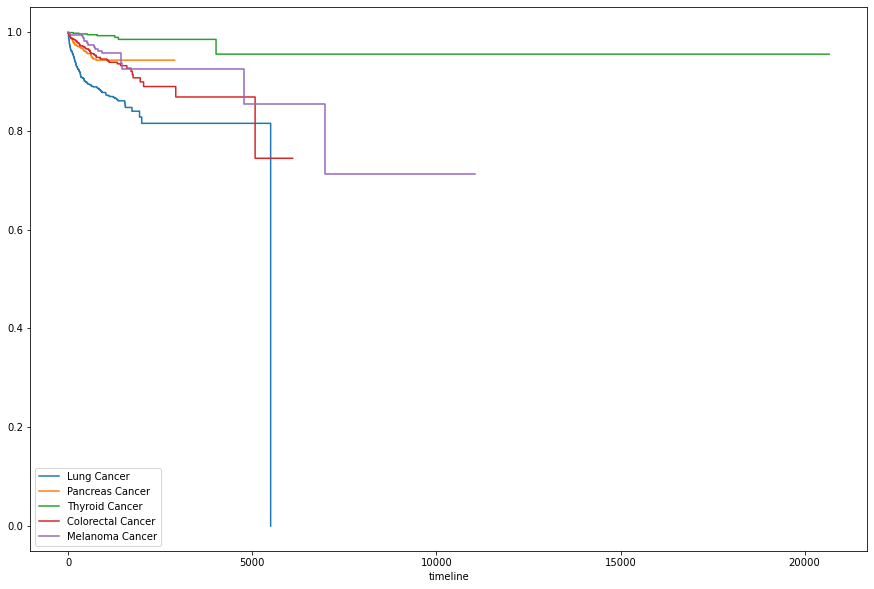

In [68]:
kmf = KaplanMeierFitter()


kmf.fit(LUNG_DUR,LUNG_EVENT,label='Lung Cancer')
ax = kmf.plot(figsize=(15,10),ci_show=False)

kmf.fit(PANCREAS_DUR,PANCREAS_EVENT, label='Pancreas Cancer')
ax1 = kmf.plot(ax=ax,ci_show=False)

kmf.fit(THYROID_DUR,THYROID_EVENT, label='Thyroid Cancer')
ax2 = kmf.plot(ax=ax1,ci_show=False)

kmf.fit(COLORECTAL_DUR,COLORECTAL_EVENT, label='Colorectal Cancer')
ax3 = kmf.plot(ax=ax2,ci_show=False)

kmf.fit(MELANOMA_DUR,MELANOMA_EVENT, label='Melanoma Cancer')
ax4 = kmf.plot(ax=ax3,ci_show=False)

In [65]:
df3[(df3['LUNG']+df3['PANCREAS']+df3['THYROID']+df3['COLORECTAL']+df3['MELANOMA'])>1]

,BIRTH_DATE_off,DEATH_DATE_off,sex,race,LUNG,PANCREAS,THYROID,COLORECTAL,MELANOMA,LUNG DT,...,PANCREAS_DA,THYROID_DA,COLORECTAL_DA,MELANOMA_DA,Cut Off Date,LUNG_DUR,PANCREAS_DUR,THYROID_DUR,COLORECTAL_DUR,MELANOMA_DUR
41,1928-03-25,NaT,Female,African-American,1,0,0,1,0,2012-02-22,...,NaN,NaN,85.0,NaN,2016-08-25,1646.0,NaN,NaN,988.0,NaN
164,1924-11-30,NaT,Female,African-American,1,0,0,1,0,2013-02-04,...,NaN,NaN,89.0,NaN,2016-08-25,1298.0,NaN,NaN,1319.0,NaN
308,1954-04-20,NaT,Female,African-American,0,0,1,1,0,NaT,...,NaN,61.0,56.0,NaN,2016-08-25,NaN,NaN,477.0,2091.0,NaN
557,1942-11-10,NaT,Female,White,1,0,0,1,0,2013-09-14,...,NaN,NaN,71.0,NaN,2016-08-25,1076.0,NaN,NaN,1105.0,NaN
611,1955-03-23,NaT,Male,White,0,1,0,0,1,NaT,...,59.0,NaN,NaN,58.0,2016-08-25,NaN,923.0,NaN,NaN,986.0
1087,1936-02-24,NaT,Male,White,0,1,0,0,1,NaT,...,75.0,NaN,NaN,76.0,2016-08-25,NaN,1977.0,NaN,NaN,1618.0
1467,1951-07-25,NaT,Female,White,1,0,0,1,0,2012-05-22,...,NaN,NaN,61.0,NaN,2016-08-25,1556.0,NaN,NaN,1566.0,NaN
1490,1947-06-02,2016-02-10,Male,Others,1,0,1,0,0,2013-12-27,...,NaN,67.0,NaN,NaN,2016-08-25,775.0,NaN,523.0,NaN,NaN
1510,1940-05-24,NaT,Male,White,1,0,0,1,0,2014-07-21,...,NaN,NaN,71.0,NaN,2016-08-25,766.0,NaN,NaN,1782.0,NaN
1660,1931-09-09,NaT,Female,White,1,0,1,0,0,2013-08-27,...,NaN,82.0,NaN,NaN,2016-08-25,1094.0,NaN,1105.0,NaN,NaN


#### A1: Thyroid cancer has the highest survival
#### A2: Lung cancer has the lowest survival ???
#### A3: 29 Patients had 2 cancer diagnosis

### Question 4: Which age group has the lowest survial after 400 days since cancer diagnosis

In [ ]:
kmf.fit(PANCREAS_DUR,PANCREAS_EVENT,label='Pancreas Cancer')
ax = kmf.plot(figsize=(10,6),ci_show=False)

In [ ]:
kmf.fit(LUNG_DUR,LUNG_EVENT,label='Lung Cancer')
ax = kmf.plot(figsize=(10,6),ci_show=False)

In [ ]:
df3.info()

In [ ]:
df3['LUNG_DAG'] = df3['LUNG_DA']//10
df3['PANCREAS_DAG'] = df3['PANCREAS_DA']//10
df3['THYROID_DAG'] = df3['THYROID_DA']//10
df3['COLORECTAL_DAG'] = df3['COLORECTAL_DA']//10
df3['MELANOMA_DAG'] = df3['MELANOMA_DA']//10

In [ ]:
df3.loc[df3['LUNG_DA']%10==0,'LUNG_DAG']=df3.loc[df3['LUNG_DA']%10==0,'LUNG_DAG']-1
df3.loc[df3['PANCREAS_DA']%10==0,'PANCREAS_DAG']=df3.loc[df3['PANCREAS_DA']%10==0,'PANCREAS_DAG']-1
df3.loc[df3['THYROID_DA']%10==0,'THYROID_DAG']=df3.loc[df3['THYROID_DA']%10==0,'THYROID_DAG']-1
df3.loc[df3['COLORECTAL_DA']%10==0,'COLORECTAL_DAG']=df3.loc[df3['COLORECTAL_DA']%10==0,'COLORECTAL_DAG']-1
df3.loc[df3['MELANOMA_DA']%10==0,'MELANOMA_DAG']=df3.loc[df3['MELANOMA_DA']%10==0,'MELANOMA_DAG']-1

In [ ]:
df3.loc[df3['LUNG_DAG']==10,'LUNG_DAG']=9
df3.loc[df3['PANCREAS_DAG']==10,'PANCREAS_DAG']=9
df3.loc[df3['THYROID_DAG']==10,'THYROID_DAG']=9
df3.loc[df3['COLORECTAL_DAG']==10,'COLORECTAL_DAG']=9
df3.loc[df3['MELANOMA_DAG']==10,'MELANOMA_DAG']=9

In [ ]:
df3.loc[df3['LUNG_DA']%10==0][['LUNG_DA','LUNG_DAG']]

In [ ]:
df3.info()

In [ ]:
AG0_DUR = np.concatenate((df3[df3['LUNG_DAG']==0]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==0]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==0]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==0]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==0]['MELANOMA_DUR']))

In [ ]:
AG0_EVENT = np.concatenate((df3[df3['LUNG_DAG']==0]['Death'],df3[df3['PANCREAS_DAG']==0]['Death'],df3[df3['THYROID_DAG']==0]['Death'],df3[df3['COLORECTAL_DAG']==0]['Death'],df3[df3['MELANOMA_DAG']==0]['Death']))

In [ ]:
AG1_DUR = np.concatenate((df3[df3['LUNG_DAG']==1]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==1]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==1]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==1]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==1]['MELANOMA_DUR']))
AG1_EVENT = np.concatenate((df3[df3['LUNG_DAG']==1]['Death'],df3[df3['PANCREAS_DAG']==1]['Death'],df3[df3['THYROID_DAG']==1]['Death'],df3[df3['COLORECTAL_DAG']==1]['Death'],df3[df3['MELANOMA_DAG']==1]['Death']))

In [ ]:
AG2_DUR = np.concatenate((df3[df3['LUNG_DAG']==2]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==2]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==2]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==2]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==2]['MELANOMA_DUR']))
AG2_EVENT = np.concatenate((df3[df3['LUNG_DAG']==2]['Death'],df3[df3['PANCREAS_DAG']==2]['Death'],df3[df3['THYROID_DAG']==2]['Death'],df3[df3['COLORECTAL_DAG']==2]['Death'],df3[df3['MELANOMA_DAG']==2]['Death']))

In [ ]:
AG3_DUR = np.concatenate((df3[df3['LUNG_DAG']==3]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==3]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==3]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==3]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==3]['MELANOMA_DUR']))
AG3_EVENT = np.concatenate((df3[df3['LUNG_DAG']==3]['Death'],df3[df3['PANCREAS_DAG']==3]['Death'],df3[df3['THYROID_DAG']==3]['Death'],df3[df3['COLORECTAL_DAG']==3]['Death'],df3[df3['MELANOMA_DAG']==3]['Death']))

In [ ]:
AG4_DUR = np.concatenate((df3[df3['LUNG_DAG']==4]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==4]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==4]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==4]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==4]['MELANOMA_DUR']))
AG4_EVENT = np.concatenate((df3[df3['LUNG_DAG']==4]['Death'],df3[df3['PANCREAS_DAG']==4]['Death'],df3[df3['THYROID_DAG']==4]['Death'],df3[df3['COLORECTAL_DAG']==4]['Death'],df3[df3['MELANOMA_DAG']==4]['Death']))

In [ ]:
AG5_DUR = np.concatenate((df3[df3['LUNG_DAG']==5]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==5]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==5]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==5]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==5]['MELANOMA_DUR']))
AG5_EVENT = np.concatenate((df3[df3['LUNG_DAG']==5]['Death'],df3[df3['PANCREAS_DAG']==5]['Death'],df3[df3['THYROID_DAG']==5]['Death'],df3[df3['COLORECTAL_DAG']==5]['Death'],df3[df3['MELANOMA_DAG']==5]['Death']))

In [ ]:
AG6_DUR = np.concatenate((df3[df3['LUNG_DAG']==6]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==6]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==6]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==6]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==6]['MELANOMA_DUR']))
AG6_EVENT = np.concatenate((df3[df3['LUNG_DAG']==6]['Death'],df3[df3['PANCREAS_DAG']==6]['Death'],df3[df3['THYROID_DAG']==6]['Death'],df3[df3['COLORECTAL_DAG']==6]['Death'],df3[df3['MELANOMA_DAG']==6]['Death']))

In [ ]:
AG7_DUR = np.concatenate((df3[df3['LUNG_DAG']==7]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==7]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==7]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==7]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==7]['MELANOMA_DUR']))
AG7_EVENT = np.concatenate((df3[df3['LUNG_DAG']==7]['Death'],df3[df3['PANCREAS_DAG']==7]['Death'],df3[df3['THYROID_DAG']==7]['Death'],df3[df3['COLORECTAL_DAG']==7]['Death'],df3[df3['MELANOMA_DAG']==7]['Death']))

In [ ]:
AG8_DUR = np.concatenate((df3[df3['LUNG_DAG']==8]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==8]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==8]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==8]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==8]['MELANOMA_DUR']))
AG8_EVENT = np.concatenate((df3[df3['LUNG_DAG']==8]['Death'],df3[df3['PANCREAS_DAG']==8]['Death'],df3[df3['THYROID_DAG']==8]['Death'],df3[df3['COLORECTAL_DAG']==8]['Death'],df3[df3['MELANOMA_DAG']==8]['Death']))

In [ ]:
AG9_DUR = np.concatenate((df3[df3['LUNG_DAG']==9]['LUNG_DUR'],df3[df3['PANCREAS_DAG']==9]['PANCREAS_DUR'],df3[df3['THYROID_DAG']==9]['THYROID_DUR'],df3[df3['COLORECTAL_DAG']==9]['COLORECTAL_DUR'],df3[df3['MELANOMA_DAG']==9]['MELANOMA_DUR']))
AG9_EVENT = np.concatenate((df3[df3['LUNG_DAG']==9]['Death'],df3[df3['PANCREAS_DAG']==9]['Death'],df3[df3['THYROID_DAG']==9]['Death'],df3[df3['COLORECTAL_DAG']==9]['Death'],df3[df3['MELANOMA_DAG']==9]['Death']))

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(AG0_DUR,AG0_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG1_DUR,AG1_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG2_DUR,AG2_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG3_DUR,AG3_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG4_DUR,AG4_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG5_DUR,AG5_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG6_DUR,AG6_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG7_DUR,AG7_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG8_DUR,AG8_EVENT)
kmf.predict(400)

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AG9_DUR,AG9_EVENT)
kmf.predict(400)

#### A4: Technically, Age Group of (100-110) has the lowest survival after 400 days since cancer diagnosis, and the survival rate is 0. However, there is only one individual that is the case. If we exclude that individual, the age group that has the lowest survical rate is (90-100).

### Question 5: What is the survival rate for females with colorectal cancer after 1000 days since diagnosis?

In [ ]:
F_C_DUR = df3[(df3['sex']=='Female') & (df3['COLORECTAL']==1)]['COLORECTAL_DUR'].values

In [ ]:
F_C_EVENT = df3[(df3['sex']=='Female') & (df3['COLORECTAL']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(F_C_DUR,F_C_EVENT)
kmf.predict(1000)

### Question 6: What is the survival rate for males with lung cancer after 300 days since diagnosis?

In [ ]:
M_L_DUR = df3[(df3['sex']=='Male') & (df3['LUNG']==1)]['LUNG_DUR'].values

In [ ]:
M_L_EVENT = df3[(df3['sex']=='Male') & (df3['LUNG']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(M_L_DUR,M_L_EVENT)
kmf.predict(300)

### Question 7: What is the survivial rate for females with melanoma cancer after 1200 days since diagnosis?

In [ ]:
F_M_DUR = df3[(df3['sex']=='Female') & (df3['MELANOMA']==1)]['MELANOMA_DUR'].values

In [ ]:
F_M_EVENT = df3[(df3['sex']=='Female') & (df3['MELANOMA']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(F_M_DUR,F_M_EVENT)
kmf.predict(1200)

### Question 8: What is the survival rate for males with thyroid cancer after 1500 days since diagnosis?

In [ ]:
M_T_DUR = df3[(df3['sex']=='Male') & (df3['THYROID']==1)]['THYROID_DUR'].values

In [ ]:
M_T_EVENT = df3[(df3['sex']=='Male') & (df3['THYROID']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(M_T_DUR,M_T_EVENT)
kmf.predict(1500)

### Question 9: What is the survival rate for males with pancreatic cancer after 2200 days since diagnosis?

In [ ]:
M_P_DUR = df3[(df3['sex']=='Male') & (df3['PANCREAS']==1)]['PANCREAS_DUR'].values

In [ ]:
M_P_EVENT = df3[(df3['sex']=='Male') & (df3['PANCREAS']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(M_P_DUR,M_P_EVENT)
kmf.predict(2200)

In [ ]:
df3['race'].value_counts()

### Question 10: What is the survival rate for African-American with colorectal cancer after 2000 days since diagnosis?

In [ ]:
AA_C_DUR = df3[(df3['race']=='African-American') & (df3['COLORECTAL']==1)]['COLORECTAL_DUR'].values

In [ ]:
AA_C_EVENT = df3[(df3['race']=='African-American') & (df3['COLORECTAL']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AA_C_DUR,AA_C_EVENT)
kmf.predict(2000)

### Question 11: What is the survival rate for Whites with lung cancer after 1000 days since diagnosis?

In [ ]:
W_L_DUR = df3[(df3['race']=='White') & (df3['LUNG']==1)]['LUNG_DUR'].values

In [ ]:
W_L_EVENT = df3[(df3['race']=='White') & (df3['LUNG']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(W_L_DUR,W_L_EVENT)
kmf.predict(1000)

### Question 12: What is the survival rate for African-Americans with melanoma cancer after 2 years since diagnosis?

In [ ]:
AA_M_DUR = df3[(df3['race']=='African-American') & (df3['MELANOMA']==1)]['MELANOMA_DUR'].values

In [ ]:
AA_M_EVENT = df3[(df3['race']=='African-American') & (df3['MELANOMA']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(AA_M_DUR,AA_M_EVENT)
kmf.predict(365*2)

### Question 13: What is the survival rate for Whites with pancreatic cancer after 3 years since diagnosis?

In [ ]:
W_P_DUR = df3[(df3['race']=='White') & (df3['PANCREAS']==1)]['PANCREAS_DUR'].values

In [ ]:
W_P_EVENT = df3[(df3['race']=='White') & (df3['PANCREAS']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(W_P_DUR,W_P_EVENT)
kmf.predict(365*3)

### Question 14: What is the survival rate for Asians with thyroid cancer after 1500 days since diagnosis?

In [ ]:
A_T_DUR = df3[(df3['race']=='Asian/Mideast Indian') & (df3['THYROID']==1)]['THYROID_DUR'].values

In [ ]:
A_T_EVENT = df3[(df3['race']=='Asian/Mideast Indian') & (df3['THYROID']==1)]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(A_T_DUR,A_T_EVENT)
kmf.predict(1500)

### Question 15: Which age group has the lowest survival for colorectal cancer at the end of the study?

In [ ]:
for i in range(10):
    EVENT = df3[df3['COLORECTAL_DAG']==i]['Death'].values
    if len(EVENT)!=0:
        print('Survival Rate for age group {} at the end of the study is {}'.format(i,1-sum(EVENT)/len(EVENT)))
    else:
        print('There is no colorectal cancer case in {} age group'.format(i))

Age group of (91-110) has the lowest survival rate for the colorectal cancer at the end of the study

### Question 16: Which age group has the highest survival for lung cancer at the end of the study

In [ ]:
for i in range(10):
    EVENT = df3[df3['LUNG_DAG']==i]['Death'].values
    if len(EVENT)!=0:
        print('Survival Rate for age group {} at the end of the study is {}'.format(i,1-sum(EVENT)/len(EVENT)))
    else:
        print('There is no lung cancer case in {} age group'.format(i))

In [ ]:
df3[df3['LUNG_DAG']==4]['Death'].values

Age group (1-10), (11-20) and (21-30) all have the survival rate of 100% by the end of the study, followed by Age group (41-50) with survival rate of 0.9647.

In [ ]:
df3.info()

### Question 17: What is the survival rate for 61-70 age group with melanoma cancer after 5 years since diagnosis?

In [ ]:
SIX_AG_M_DUR = df3[df3['MELANOMA_DAG']==6]['MELANOMA_DUR'].values

In [ ]:
SIX_AG_M_EVENT = df3[df3['MELANOMA_DAG']==6]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(SIX_AG_M_DUR,SIX_AG_M_EVENT)
kmf.predict(365*5)

### Question 18: What is the survival rate for 21-30 age group with pancreatic cancer after a years since diagnosis?

In [ ]:
TWO_AG_P_DUR = df3[df3['PANCREAS_DAG']==2]['PANCREAS_DUR'].values

In [ ]:
TWO_AG_P_EVENT = df3[df3['PANCREAS_DAG']==2]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(TWO_AG_P_DUR,TWO_AG_P_EVENT)
kmf.predict(365)

### Question 19: What is the survival rate for 51-60 age group with thyroid cancer after 2200 days since diagnosis?

In [ ]:
FIVE_AG_T_DUR = df3[df3['THYROID_DAG']==5]['THYROID_DUR'].values

In [ ]:
FIVE_AG_T_EVENT = df3[df3['THYROID_DAG']==5]['Death'].values

In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(FIVE_AG_T_DUR,FIVE_AG_T_EVENT)
kmf.predict(2200)

In [ ]:
FIVE_AG_T_EVENT

### Question 20: Which race has the high survival for all cancers after 2500 days since diagnosis?

In [ ]:
df3['race'].value_counts()

In [ ]:
df3['race'].unique()

In [ ]:
for race in df3['race'].unique():
    DUR = np.concatenate((df3[(df3['race']==race) & (df3['LUNG']==1)]['LUNG_DUR'],df3[(df3['race']==race)& (df3['PANCREAS']==1)]['PANCREAS_DUR'],df3[(df3['race']==race)&(df3['THYROID']==1)]['THYROID_DUR'],df3[(df3['race']==race)&(df3['COLORECTAL']==1)]['COLORECTAL_DUR'],df3[(df3['race']==race)&(df3['MELANOMA']==1)]['MELANOMA_DUR']))
    EVENT = np.concatenate((df3[(df3['race']==race) & (df3['LUNG']==1)]['Death'],df3[(df3['race']==race)& (df3['PANCREAS']==1)]['Death'],df3[(df3['race']==race)&(df3['THYROID']==1)]['Death'],df3[(df3['race']==race)&(df3['COLORECTAL']==1)]['Death'],df3[(df3['race']==race)&(df3['MELANOMA']==1)]['Death']))
    kmf = KaplanMeierFitter()
    kmf.fit(DUR,EVENT)
    print('{} has survival rate of {} for all cancers after 2500 days since diagnosis'.format(race,kmf.predict(2500)))
    print('----------------------')
    

White has the highest survival rate for all cancers after 2500 days since diagnosis.